## Transformation

### Standardisation(z score normalisation)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

plt.rcParams['figure.figsize']=[8,6]
sns.set_style('darkgrid')
ad=pd.read_csv(r"Air_Quality.csv")
ad.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0


In [2]:
#converting "pollutant_id" into numeric 'le_pollutant_id(using label encoding)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(ad['pollutant_id'])
ad['le_pollutant_id']=le.transform(ad['pollutant_id'])
ad.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,le_pollutant_id
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00:00,69.0,109.0,86.0,5
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00:00,82.0,138.0,105.0,4
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00:00,10.0,42.0,19.0,2
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00:00,4.0,5.0,4.0,1
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00:00,16.0,42.0,27.0,6


In [3]:
#Numerical columns extracting
ad_a=ad[['pollutant_avg','pollutant_min','pollutant_max','le_pollutant_id']]
ad_a.head()

,pollutant_avg,pollutant_min,pollutant_max,le_pollutant_id
0,86.0,69.0,109.0,5
1,105.0,82.0,138.0,4
2,19.0,10.0,42.0,2
3,4.0,4.0,5.0,1
4,27.0,16.0,42.0,6


In [4]:
# statistical measures

ad_a.describe() #observe the difference between mean,min and max values for the three columns

,pollutant_avg,pollutant_min,pollutant_max,le_pollutant_id
count,1738.000000,1738.000000,1738.000000,1836.000000
mean,54.100690,28.414269,96.873418,3.016885
std,60.824158,34.403811,104.765094,2.003060
min,1.000000,1.000000,1.000000,0.000000
25%,12.000000,5.000000,21.000000,1.000000
50%,31.000000,14.000000,63.000000,3.000000
75%,70.000000,39.000000,124.000000,5.000000
max,314.000000,217.000000,500.000000,6.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(ad_a)
ad_a_scaled=scaler.transform(ad_a)
ad_a_scaled=pd.DataFrame(ad_a_scaled,columns=ad_a.columns)
ad_a_scaled.head()

,pollutant_avg,pollutant_min,pollutant_max,le_pollutant_id
0,0.524602,1.180027,0.115784,0.990313
1,0.837068,1.558000,0.392673,0.490941
2,-0.577251,-0.535393,-0.523927,-0.507804
3,-0.823934,-0.709843,-0.877199,-1.007176
4,-0.445686,-0.360944,-0.523927,1.489685


<AxesSubplot:xlabel='pollutant_avg', ylabel='Density'>

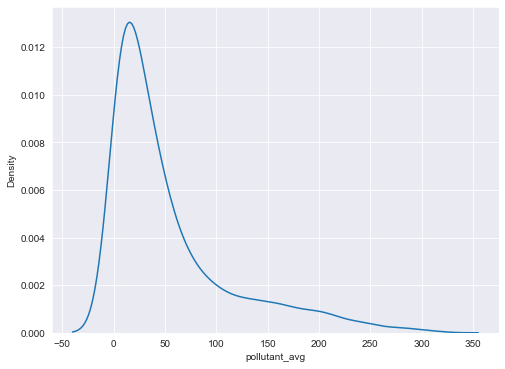

In [6]:
sns.kdeplot(ad_a['pollutant_avg'])

<AxesSubplot:xlabel='pollutant_max', ylabel='Density'>

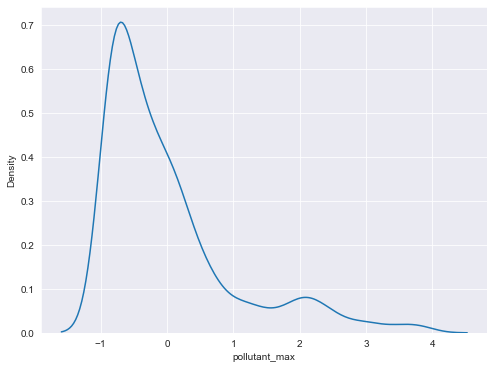

In [7]:
sns.kdeplot(ad_a_scaled['pollutant_max'])

<AxesSubplot:xlabel='pollutant_min', ylabel='Density'>

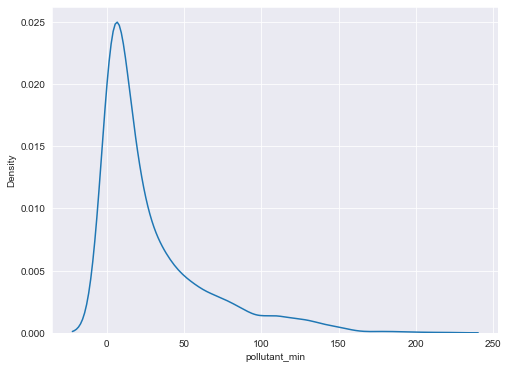

In [8]:
sns.kdeplot(ad_a['pollutant_min'])

<AxesSubplot:xlabel='pollutant_avg', ylabel='Density'>

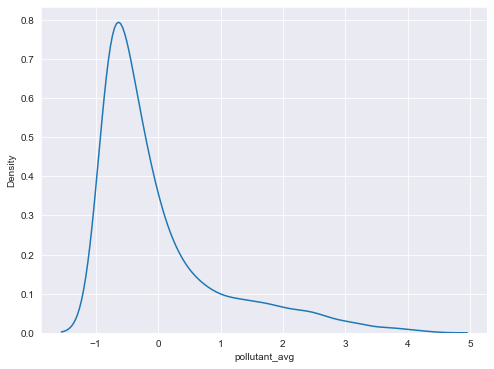

In [9]:
sns.kdeplot(ad_a_scaled['pollutant_avg'])

<AxesSubplot:xlabel='pollutant_max', ylabel='Density'>

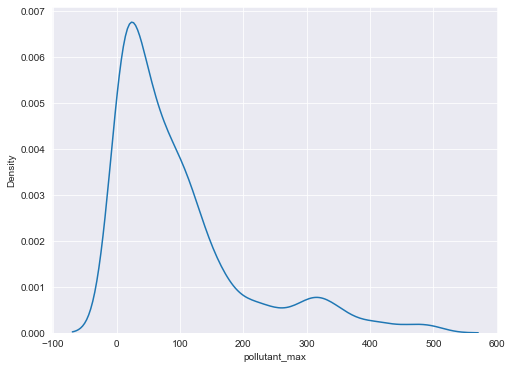

In [10]:
sns.kdeplot(ad_a['pollutant_max'])

<AxesSubplot:xlabel='pollutant_max', ylabel='Density'>

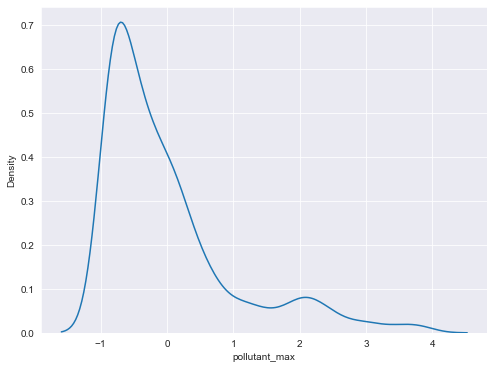

In [11]:
sns.kdeplot(ad_a_scaled['pollutant_max'])

<AxesSubplot:xlabel='le_pollutant_id', ylabel='Density'>

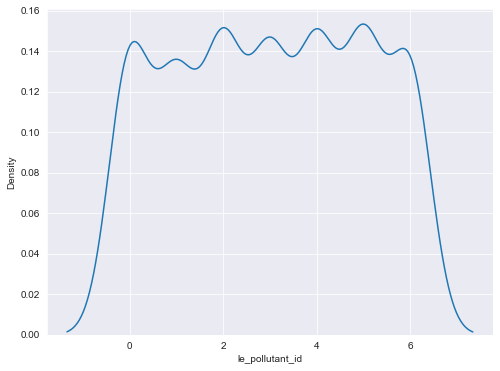

In [12]:
sns.kdeplot(ad_a['le_pollutant_id'])

<AxesSubplot:xlabel='le_pollutant_id', ylabel='Density'>

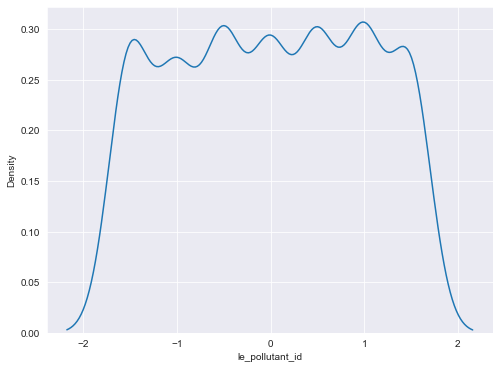

In [13]:
sns.kdeplot(ad_a_scaled['le_pollutant_id'])

### Min/max scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(ad_a)
ad_a_mmscaled=scaler.transform(ad_a)
ad_a_mmscaled=pd.DataFrame(ad_a_mmscaled,columns=ad_a.columns)
ad_a_mmscaled.head()

,pollutant_avg,pollutant_min,pollutant_max,le_pollutant_id
0,0.271565,0.314815,0.216433,0.833333
1,0.332268,0.375000,0.274549,0.666667
2,0.057508,0.041667,0.082164,0.333333
3,0.009585,0.013889,0.008016,0.166667
4,0.083067,0.069444,0.082164,1.000000


### Kernal density plot

<AxesSubplot:xlabel='pollutant_avg', ylabel='Density'>

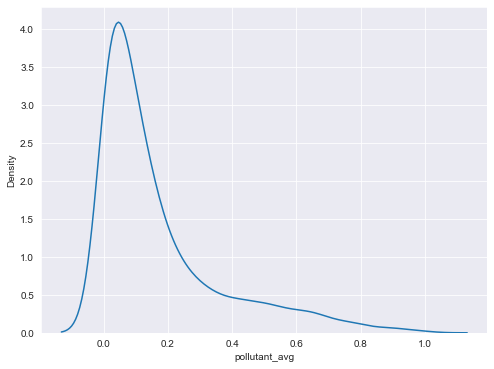

In [15]:
sns.kdeplot(ad_a_mmscaled['pollutant_avg'])

<AxesSubplot:xlabel='pollutant_min', ylabel='Density'>

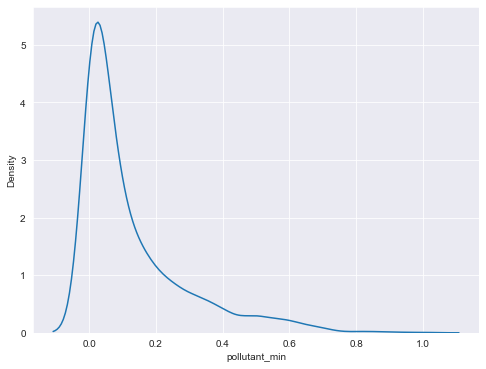

In [16]:
sns.kdeplot(ad_a_mmscaled['pollutant_min'])

<AxesSubplot:xlabel='pollutant_max', ylabel='Density'>

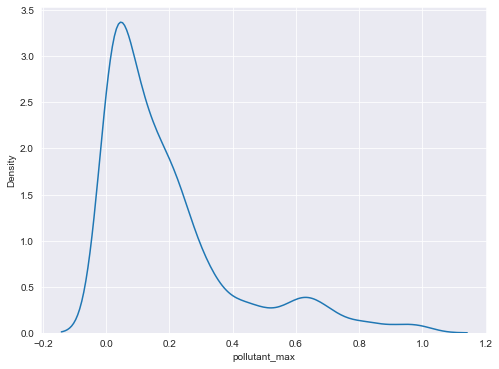

In [17]:
sns.kdeplot(ad_a_mmscaled['pollutant_max'])